도착항 국가에 따른 대기시간 분포

In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("../../train.csv")

In [3]:
train_df.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,LENGTH,SHIPMANAGER,FLAG,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,PORT_SIZE,CI_HOUR
0,TRAIN_000000,SG,GIW5,Container,30.881018,2018-12-17 21:29,Z618338,30.0,24,24300,...,180.0,CQSB78,Panama,NaN,NaN,NaN,NaN,5,0.002615,3.450000
1,TRAIN_000001,IN,UJM2,Bulk,0.000000,2014-09-23 6:59,X886125,30.0,13,35900,...,180.0,SPNO34,Marshall Islands,NaN,NaN,NaN,NaN,12,0.000217,0.000000
2,TRAIN_000002,CN,EUC8,Container,0.000000,2015-02-03 22:00,T674582,50.0,12,146000,...,370.0,FNPK22,Malta,NaN,NaN,NaN,NaN,6,0.001614,0.000000
3,TRAIN_000003,JP,ZAG4,Container,0.000000,2020-01-17 4:02,Y847238,20.0,18,6910,...,120.0,PBZV77,Bahamas,-3.18,-1.61,6.7,2.629350,13,0.000356,0.000000
4,TRAIN_000004,SG,GIW5,Container,27.037650,2020-01-26 7:51,A872328,50.0,10,116000,...,300.0,GUCE76,Liberia,-0.33,-3.28,25.6,2.495953,15,0.002615,253.554444


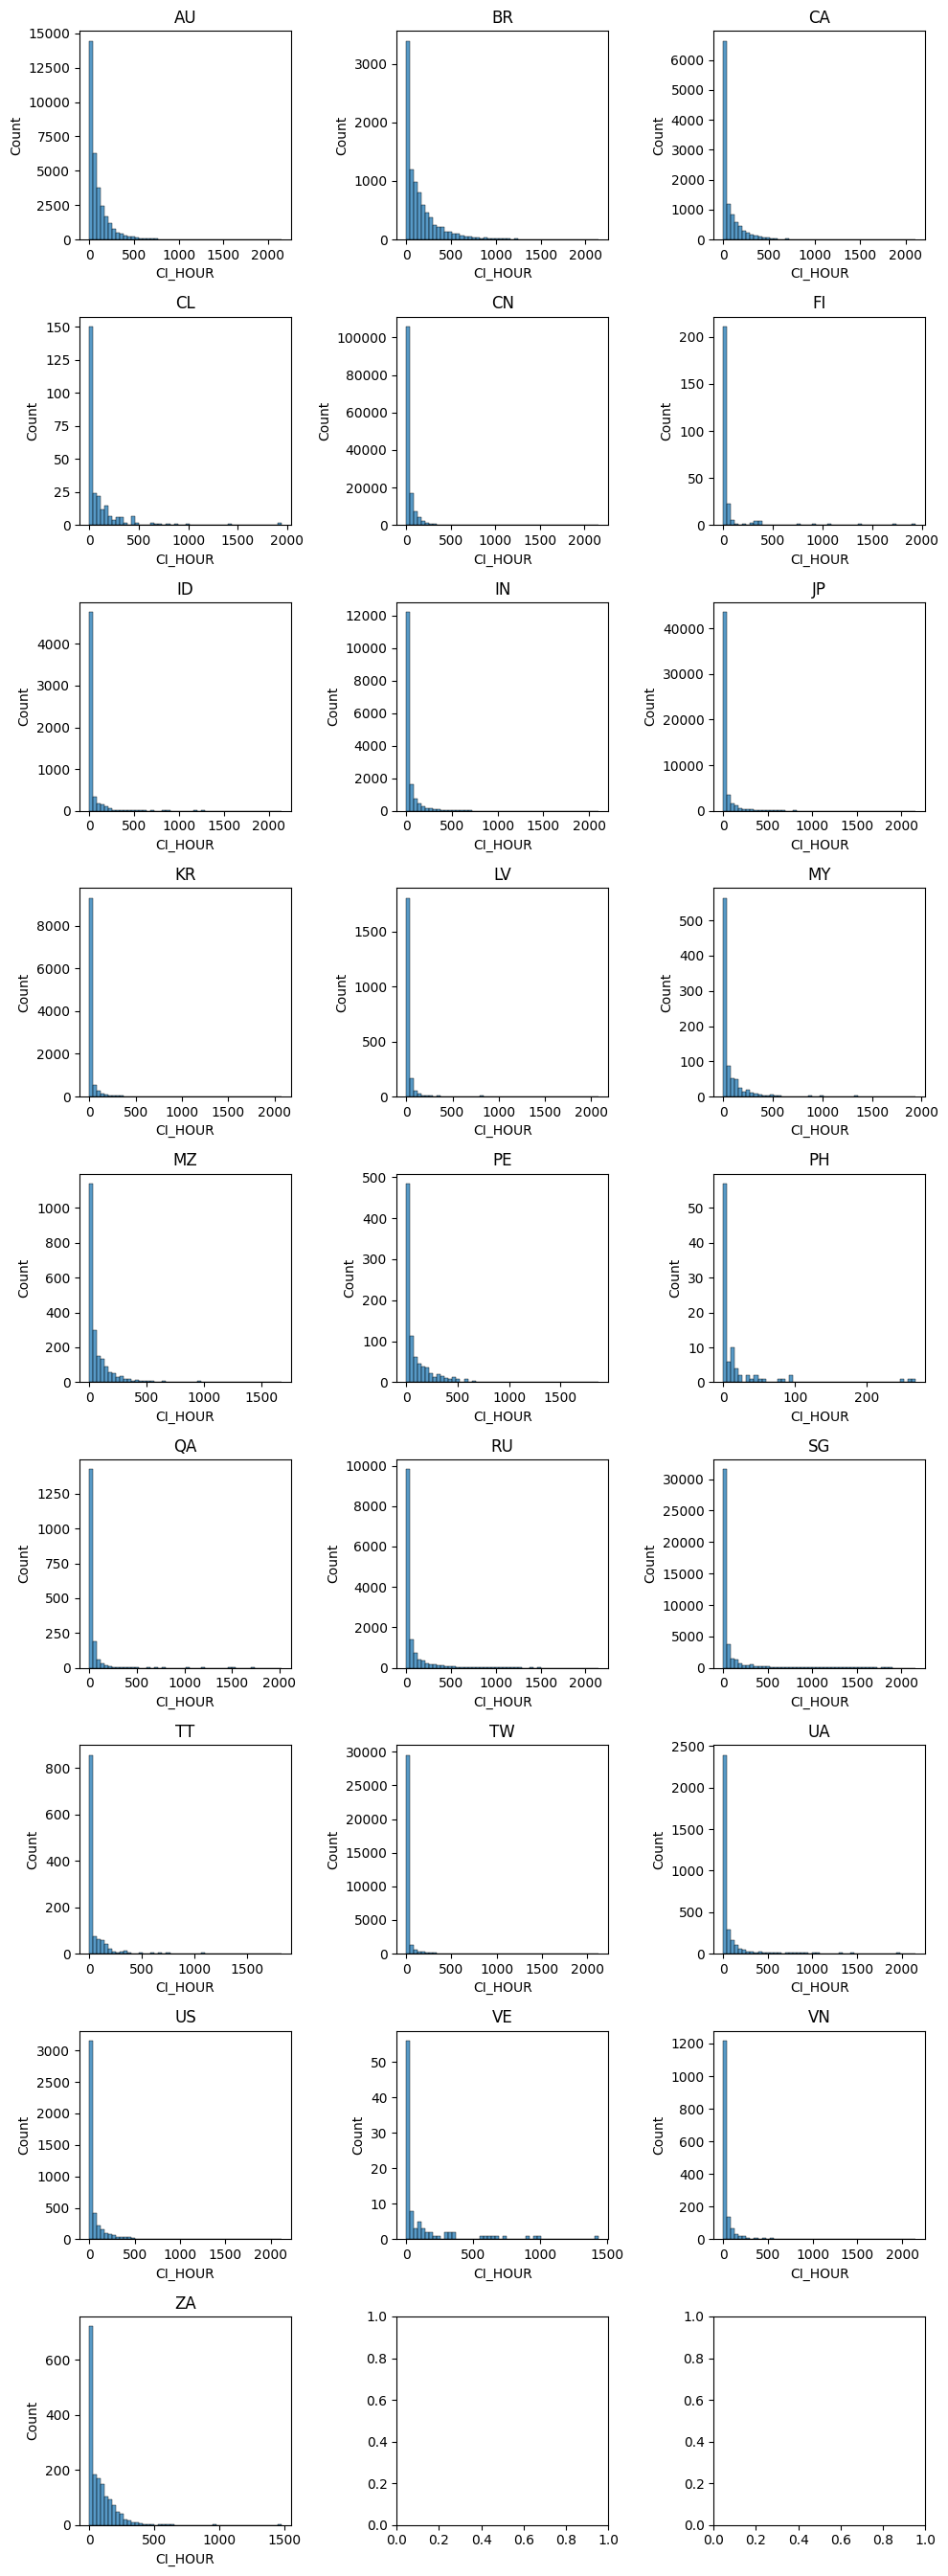

In [10]:
unique_names = sorted(train_df["ARI_CO"].unique())

# subplot을 생성하기 위한 행과 열의 수를 계산합니다.
num_cols = 3  # 여기서는 1열로 표시합니다.
num_rows = len(unique_names) // num_cols+ bool(len(unique_names) % num_cols)

# 전체 figure를 생성합니다.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# 각 고유한 "ARI_CO" 값에 대한 subplot을 생성합니다.
for i, name in enumerate(unique_names):
    row = i // num_cols
    col = i % num_cols
    df = train_df[train_df["ARI_CO"] == name]
    ax = sns.histplot(df["CI_HOUR"], bins=50, ax=axes[row, col])
    ax.set_title(name)

# subplot 간의 간격을 조정합니다.
plt.tight_layout()

# 전체 figure를 표시합니다.
plt.show()

NanumBarunGothic


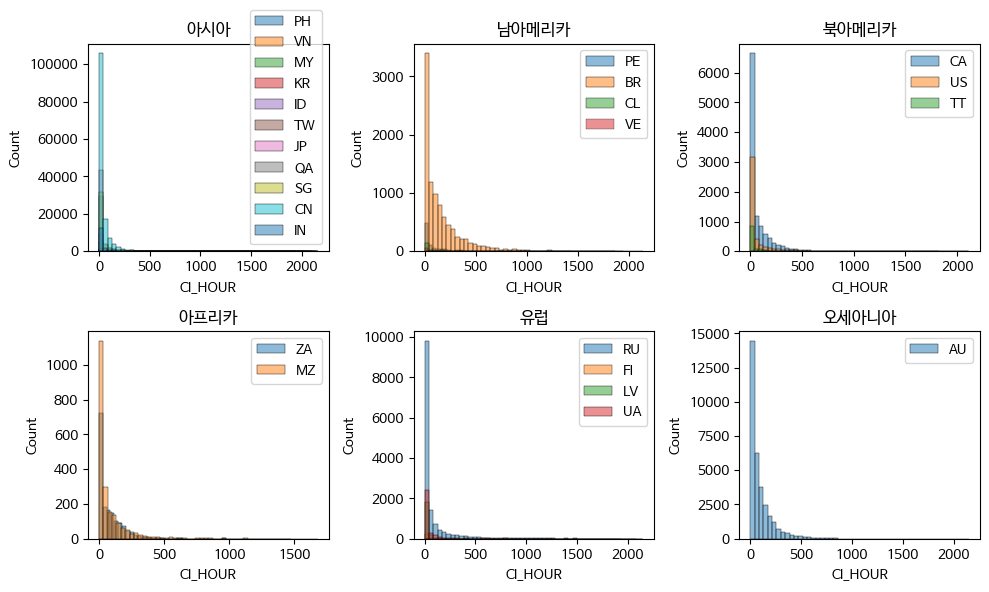

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 국가 코드를 대륙별로 그룹화합니다.
continents = {
    "아시아": ["PH", "VN", "MY", "KR", "ID", "TW", "JP", "QA", "SG", "CN", "IN"],
    "남아메리카": ["PE", "BR", "CL", "VE"],
    "북아메리카": ["CA", "US", "TT"],
    "아프리카": ["ZA", "MZ"],
    "유럽": ["RU", "FI", "LV", "UA"],
    "오세아니아": ["AU"]
}

num_cols = 3
num_rows = len(continents) // num_cols + bool(len(continents) % num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# 각 대륙별로 CI_HOUR 분포를 그립니다.
for i, (continent, countries) in enumerate(continents.items()):
    row = i // num_cols
    col = i % num_cols
    # subset = train_df[train_df["ARI_CO"].isin(countries)]
    # sns.histplot(subset["CI_HOUR"], bins=50, ax=axes[row, col]).set_title(continent)
    for country in countries:
        subset = train_df[train_df["ARI_CO"] == country]
        sns.histplot(subset["CI_HOUR"], bins=50, ax=axes[row, col], label=country, alpha=0.5)
    axes[row, col].set_title(continent)
    axes[row, col].legend()
    
# 빈 subplot이 있을 경우 숨깁니다.
for j in range(i+1, num_rows * num_cols):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()
# 결론적으로 대륙별로도 큰 insight는 없는 것 같다.
